Análisis teniendo en cuenta las ventanas

In [1]:
%cd ~/work/nbs_pipeline

/home/macu/work/nbs_pipeline


In [2]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [48]:
#file_errors_small  = 'errors_small_03022025_2.csv'
#file_results_small = 'results_small_03022025_2.csv'
file_errors_small  = 'errors_small_04022025_1.csv'
file_results_small = 'results_small_04022025_1.csv'

In [54]:
results_small = pd.read_csv(file_results_small, index_col=None, header=0)
errors_small  = pd.read_csv(file_errors_small, index_col=None, header=0)

In [5]:
print("----- ERRORS -----")
print(f"Total error cases: {len(errors_small)}")
display(errors_small.head())
print(f"Total results: {len(results_small)}")
display(results_small.head())

----- ERRORS -----
Total error cases: 0


,model_size,n_epochs,dataset_percent,maskared_percent,n_windows,windows,error


Total results: 72


,model_size,n_epochs,dataset_percent,maskared_percent,n_windows,time,first_train_loss,first_mse,first_rmse,first_mae,...,last_mae,last_smape,windows,best_epochs,train_losses,eval_pre,eval_post,full_result,first_eval_loss,last_eval_loss
0,small,1,0.25,0.25,1,2.718759,0.004636,0.062732,0.004020,0.035726,...,0.034763,0.214534,[12],[0],[0.004636025498621165],"{'mse': [0.06273242147769041], 'rmse': [0.0040...","{'mse': [0.060241822820175164], 'rmse': [0.003...","([[0.004636025498621165]], {'mse': [0.06273242...",0.003676,0.003389
1,small,1,0.25,0.25,5,12.689464,0.004159,0.069103,0.005235,0.040130,...,0.039680,0.279021,"[8, 10, 12, 16, 17]","[0, 0, 0, 0, 0]",[0.004158621851820499],"{'mse': [0.05462969779596557, 0.05795921349363...","{'mse': [0.05490484419395911, 0.05783692023356...","([[0.004158621851820499], [0.00366114697535522...",0.005235,0.005233
2,small,1,0.25,0.50,1,2.514967,0.004011,0.064546,0.004348,0.036381,...,0.036019,0.239817,[12],[0],[0.004010726860724389],"{'mse': [0.06454638758908045], 'rmse': [0.0043...","{'mse': [0.062279975450331926], 'rmse': [0.004...","([[0.004010726860724389]], {'mse': [0.06454638...",0.004003,0.003731
3,small,1,0.25,0.50,5,12.567363,0.001951,0.072155,0.005719,0.039760,...,0.040788,0.246470,"[8, 10, 12, 16, 17]","[0, 0, 0, 0, 0]",[0.0019510335754603148],"{'mse': [0.03958673276036215, 0.05773762258681...","{'mse': [0.04142985702844787, 0.05404715650013...","([[0.0019510335754603148], [0.0028582036844454...",0.005719,0.006046
4,small,1,0.25,0.75,1,2.521821,0.004786,0.072558,0.005375,0.042411,...,0.039191,0.250447,[12],[0],[0.004786438564769924],"{'mse': [0.07255762639878299], 'rmse': [0.0053...","{'mse': [0.06844241917348828], 'rmse': [0.0047...","([[0.004786438564769924]], {'mse': [0.07255762...",0.004920,0.004485


In [6]:
eval_pre = results_small["eval_pre"].apply(lambda x: ast.literal_eval(x)['loss'])

In [7]:
eval_post = results_small["eval_post"].apply(lambda x: ast.literal_eval(x)['loss'])

In [8]:
eval_pre[:3]

0                              [0.0036761150986421853]
1    [0.0028842247783258143, 0.003770156058534566, ...
2                               [0.004003469893682955]
Name: eval_pre, dtype: object

In [9]:
eval_pre[:3]

0                              [0.0036761150986421853]
1    [0.0028842247783258143, 0.003770156058534566, ...
2                               [0.004003469893682955]
Name: eval_pre, dtype: object

In [10]:
def improvement_percentage(pre, post):
    return [(p - pre_val)*100 / pre_val if pre_val != 0 else np.nan for pre_val, p in zip(pre, post)]

In [11]:
improvements = [improvement_percentage(pre, post) for pre, post in zip(eval_pre, eval_post)]

In [12]:
mean_improvements = [np.nanmean(np.array(x)) for x in improvements]

In [13]:
mean_improvements

[-7.805080800550929,
 -1.2274407372815617,
 -6.816634577523475,
 0.23844139438755452,
 -8.83131738137827,
 -2.4990910198423775,
 0.7285952352224536,
 0.6537529252665294,
 10.870200222346405,
 1.4712454702867084,
 22.43660916707371,
 12.385144491192992,
 6.412737327807728,
 2.414208006732909,
 0.11665391954962238,
 -2.0793087460008253,
 4.0266954048474926,
 5.252641333121196,
 -2.6136343194735603,
 0.44927152115204494,
 4.233144965271631,
 -0.6446378548004417,
 43.04032115121791,
 -1.0071793735295966,
 4.739347851771485,
 -0.21735501272113344,
 3.7328533292987105,
 3.206920385928902,
 8.064845609939287,
 0.14651534658464768,
 -5.508581457220885,
 -0.39347409168913544,
 9.480623686527037,
 -0.9649306698079307,
 13.895715370596198,
 -6.333569104570338,
 -1.3585369367742366,
 -0.3271609094159144,
 4.475304098045746,
 -1.7781446662264315,
 6.1232905346584525,
 10.61378253276329,
 3.6878237445430306,
 1.4542528840660913,
 3.212973490059212,
 1.8840493238959453,
 -10.390113296530194,
 0.67188

In [14]:
from copy import deepcopy

In [15]:
profile_small_df = results_small[[
    "time", 
    "n_epochs", 
    "dataset_percent", 
    "maskared_percent", 
    "n_windows", 
]].copy()
profile_small_df["improvement"] = deepcopy(mean_improvements)

In [16]:
def get_pos(x, pos, pos2 = None): 
    try:
        return x[pos][pos2]
    except:
        try:
            return x[pos]
        except:
            return x

In [17]:
results_small["last_best_epoch"] = results_small["best_epochs"].apply(
    lambda x: get_pos(ast.literal_eval(x),-1)
)
results_small["last_best_epoch"][:3]

0    0
1    0
2    0
Name: last_best_epoch, dtype: int64

<Axes: title={'center': 'Improvement per case'}>

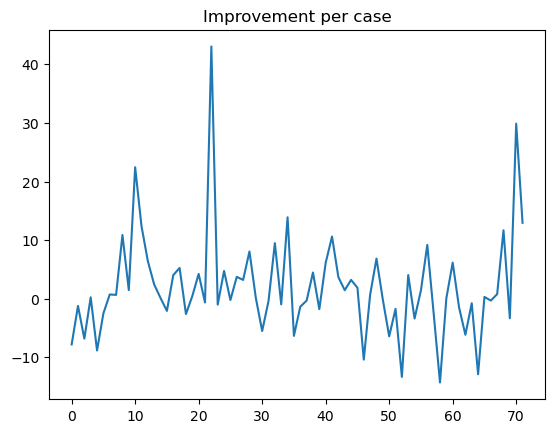

In [29]:
profile_small_df['improvement'].plot(title = "Improvement per case")

In [18]:
display(profile_small_df.sort_values('improvement', ascending = False)[:5])

,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
22,9.466968,1,1.0,0.75,1,43.040321
70,96.012274,10,1.0,0.75,1,29.873206
10,4.978301,1,0.5,0.75,1,22.436609
34,24.779348,5,0.5,0.75,1,13.895715
71,490.840574,10,1.0,0.75,5,12.954701


In [31]:
profile_small_df[profile_small_df["time"] < 8 ].shape

(9, 6)

In [32]:
display(profile_small_df[profile_small_df["time"] < 8].sort_values('improvement', ascending = False))

,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
10,4.978301,1,0.50,0.75,1,22.436609
8,4.918858,1,0.50,0.50,1,10.870200
12,7.435598,1,0.75,0.25,1,6.412737
16,7.421520,1,0.75,0.75,1,4.026695
6,4.924383,1,0.50,0.25,1,0.728595
14,7.393783,1,0.75,0.50,1,0.116654
2,2.514967,1,0.25,0.50,1,-6.816635
0,2.718759,1,0.25,0.25,1,-7.805081
4,2.521821,1,0.25,0.75,1,-8.831317


<Axes: >

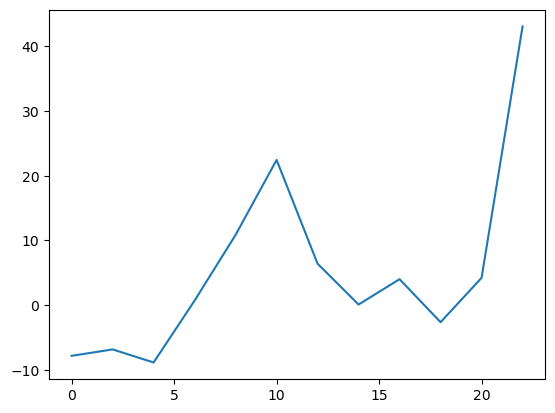

In [20]:
profile_small_df[profile_small_df["time"] < 10]["improvement"].plot()

In [21]:
print("--------------------- Train -----------------")
# Filtrar los 5 mejores loss_percents
display(profile_small_df.sort_values('improvement', ascending = False)[:5])
# Filtrar los 5 mejores loss_percent con dataset percent <= 0.25
display(profile_small_df[profile_small_df['dataset_percent'] < 0.50].sort_values('improvement', ascending = False)[:5])

--------------------- Train -----------------


,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
22,9.466968,1,1.0,0.75,1,43.040321
70,96.012274,10,1.0,0.75,1,29.873206
10,4.978301,1,0.5,0.75,1,22.436609
34,24.779348,5,0.5,0.75,1,13.895715
71,490.840574,10,1.0,0.75,5,12.954701


,time,n_epochs,dataset_percent,maskared_percent,n_windows,improvement
28,12.223046,5,0.25,0.75,1,8.064846
48,25.015260,10,0.25,0.25,1,6.844334
24,12.330504,5,0.25,0.25,1,4.739348
53,125.813246,10,0.25,0.75,5,4.040974
26,12.337571,5,0.25,0.50,1,3.732853


In [22]:
def plot_correlation(profile, figsize=(8, 6)):
    correlation_matrix = profile.corr()
    # Crear el heatmap con seaborn
    plt.figure(figsize = figsize)  # Ajusta el tamaño si es necesario
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()

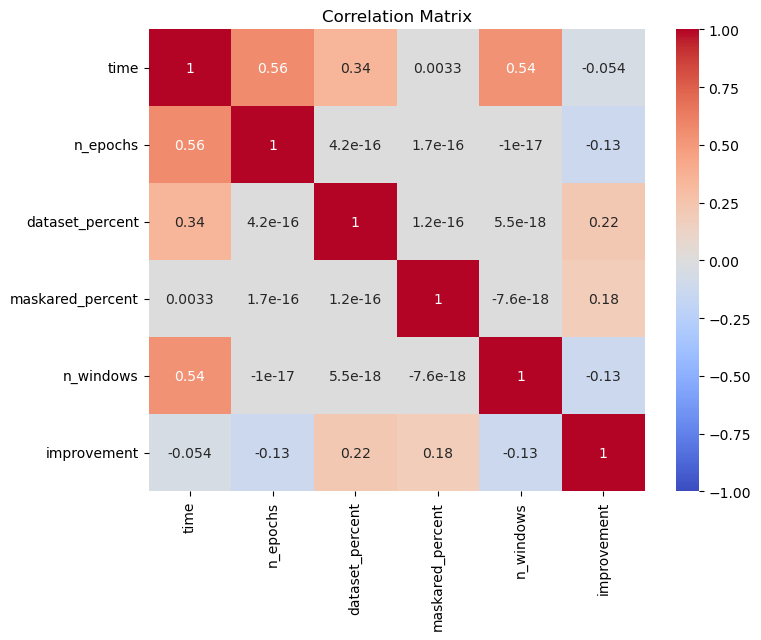

In [23]:
profile_small = ydp.ProfileReport(profile_small_df, title="Pandas Profiling Report for 'df_loss_small'", explorative=True)
plot_correlation(profile_small_df)

Dados los resultados creo que lo que más sentido tiene es hacer la tabla
- 0.25 dataset

In [64]:
results_small["best_epochs"]

0                 [0]
1     [0, 0, 0, 0, 0]
2                 [0]
3     [0, 0, 0, 0, 0]
4                 [0]
           ...       
67    [6, 3, 9, 1, 6]
68                [4]
69    [9, 3, 4, 3, 5]
70                [0]
71    [5, 2, 7, 3, 1]
Name: best_epochs, Length: 72, dtype: object

In [67]:
 results_small["best_epochs"] = results_small["best_epochs"].apply(lambda x: ast.literal_eval(x))

In [68]:
results_small["best_epochs"][0]

[0]

In [69]:
all_epochs = [epoch for sublist in results_small["best_epochs"] for epoch in sublist]
print("pre")
print(all_epochs)
all_epochs = [x for x in all_epochs if isinstance(x, int)]
print("post")
print(all_epochs)

pre
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 2, 2, 1, 0, 0, 1, 0, 3, 2, 1, 2, 0, 0, 4, 4, 0, 2, 0, 0, 2, 2, 4, 0, 0, 1, 4, 3, 4, 1, 1, 1, 3, 1, 3, 0, 2, 2, 4, 3, 3, 1, 4, 3, 0, 0, 2, 4, 1, 0, 4, 1, 4, 0, 0, 4, 0, 3, 3, 2, 4, 4, 0, 4, 1, 0, 3, 3, 9, 9, 9, 0, 7, 0, 4, 7, 3, 5, 5, 9, 9, 7, 8, 7, 8, 3, 7, 8, 3, 4, 6, 7, 9, 1, 9, 4, 1, 6, 0, 0, 7, 7, 1, 9, 6, 4, 3, 7, 3, 3, 0, 1, 1, 6, 7, 8, 8, 8, 7, 0, 4, 3, 9, 6, 3, 9, 1, 6, 4, 9, 3, 4, 3, 5, 0, 5, 2, 7, 3, 1]
post
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 2, 2, 1, 0, 0, 1, 0, 3, 2, 1, 2, 0, 0, 4, 4, 0, 2, 0, 0, 2, 2, 4, 0, 0, 1, 4, 3, 4, 1, 1, 1, 3, 1, 3, 0, 2, 2,

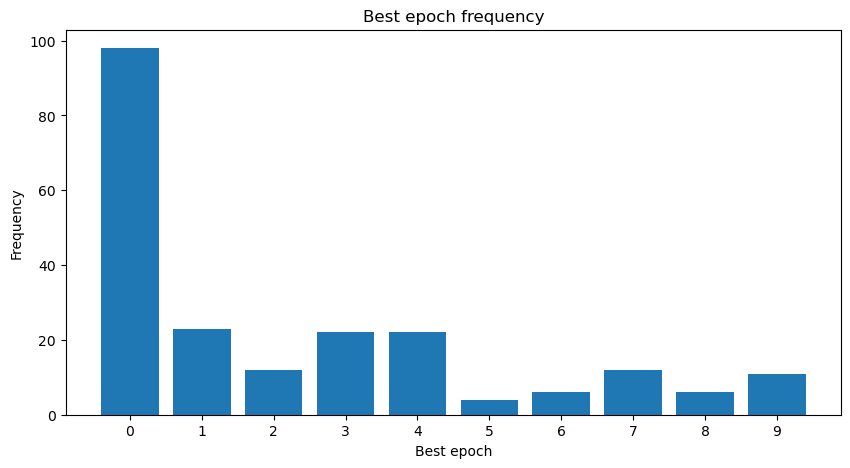

In [71]:

epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(epoch_counts.index, epoch_counts.values)
plt.xlabel("Best epoch")
plt.ylabel("Frequency")
plt.title("Best epoch frequency")
plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
plt.show()